# Problem Statement
Analyzing ad campaigns on Facebook for an event called Superhero U and identifying at least one campaign to recommend discontinuing in order to cut costs.

## Module 1: Import datasets

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
file_name="C:/Users/Welcome/Downloads/Data from marketing team - Raw Data.csv"
df=pd.read_csv(file_name)

In [4]:
df.head()

,Campaign ID,Campaign Name,Audience,Age,Geography,Reach,Impressions,Frequency,Clicks,Unique Clicks,Unique Link Clicks (ULC),Click-Through Rate (CTR),Unique Click-Through Rate (Unique CTR),Amount Spent in INR,Cost Per Click (CPC),Cost per Result (CPR)
0,Campaign 1,SHU_6 (Educators and Principals),Educators and Principals,25-34,"Group 1 (Australia, Canada, United Kingdom, Gh...",11387,23283,2.044700,487,406,180,2.091655,3.565469,1092.24,2.242790,6.07
1,Campaign 1,SHU_6 (Educators and Principals),Educators and Principals,35-44,"Group 1 (Australia, Canada, United Kingdom, Gh...",8761,15683,1.790092,484,376,154,3.086144,4.291748,835.46,1.726165,5.43
2,Campaign 1,SHU_6 (Educators and Principals),Educators and Principals,45-54,"Group 1 (Australia, Canada, United Kingdom, Gh...",2867,6283,2.191489,198,145,65,3.151361,5.057551,319.38,1.613038,4.91
3,Campaign 1,SHU_6 (Educators and Principals),Educators and Principals,55-64,"Group 1 (Australia, Canada, United Kingdom, Gh...",889,1890,2.125984,49,40,21,2.592593,4.499438,86.25,1.760117,4.11
4,Campaign 2,SHU3_ (Students Apart from India and US),Students,18-24,"Group 2 (Australia, Canada, United Kingdom, Gh...",29675,39161,1.319663,2593,1994,1095,6.621384,6.719461,1193.94,0.460448,1.09


In [5]:
df.dtypes

Campaign ID                                object
Campaign Name                              object
Audience                                   object
Age                                        object
Geography                                  object
Reach                                       int64
Impressions                                 int64
Frequency                                 float64
Clicks                                      int64
Unique Clicks                               int64
Unique Link Clicks (ULC)                    int64
Click-Through Rate (CTR)                  float64
Unique Click-Through Rate (Unique CTR)    float64
Amount Spent in INR                       float64
Cost Per Click (CPC)                      float64
Cost per Result (CPR)                     float64
dtype: object

In [6]:
df.describe()

,Reach,Impressions,Frequency,Clicks,Unique Clicks,Unique Link Clicks (ULC),Click-Through Rate (CTR),Unique Click-Through Rate (Unique CTR),Amount Spent in INR,Cost Per Click (CPC),Cost per Result (CPR)
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,5723.272727,8783.636364,1.418234,364.393939,288.000000,159.303030,4.814551,5.143724,366.321515,3.176343,7.640606
std,7671.821261,11327.981290,0.471318,556.340326,432.381125,257.960933,2.901685,2.481833,298.627967,2.841653,7.813851
min,91.000000,103.000000,1.042614,9.000000,8.000000,3.000000,1.668892,2.026599,47.260000,0.290938,0.690000
25%,889.000000,1874.000000,1.131868,49.000000,44.000000,27.000000,2.592593,3.605150,117.900000,0.683483,1.640000
50%,2557.000000,3146.000000,1.174759,135.000000,111.000000,63.000000,3.982684,4.416037,283.170000,1.760117,5.430000
75%,6145.000000,12372.000000,1.665733,325.000000,246.000000,129.000000,6.621384,6.534091,487.520000,5.486358,11.110000
max,30110.000000,39161.000000,3.169081,2593.000000,1994.000000,1095.000000,12.951807,12.131148,1193.940000,10.184692,30.550000


In [7]:
df.columns

Index(['Campaign ID', 'Campaign Name', 'Audience', 'Age', 'Geography', 'Reach',
       'Impressions', 'Frequency', 'Clicks', 'Unique Clicks',
       'Unique Link Clicks (ULC)', 'Click-Through Rate (CTR)',
       'Unique Click-Through Rate (Unique CTR)', 'Amount Spent in INR',
       'Cost Per Click (CPC)', 'Cost per Result (CPR)'],
      dtype='object')

## Module 2: Data Wrangling

In [6]:
num_duplicates=df.duplicated().sum()
num_duplicates

0

In [7]:
null_values=df.isnull().sum()
null_values

Campaign ID                               0
Campaign Name                             0
Audience                                  0
Age                                       0
Geography                                 0
Reach                                     0
Impressions                               0
Frequency                                 0
Clicks                                    0
Unique Clicks                             0
Unique Link Clicks (ULC)                  0
Click-Through Rate (CTR)                  0
Unique Click-Through Rate (Unique CTR)    0
Amount Spent in INR                       0
Cost Per Click (CPC)                      0
Cost per Result (CPR)                     0
dtype: int64

In [10]:
df.value_counts

<bound method DataFrame.value_counts of     Campaign ID                             Campaign Name   
0    Campaign 1          SHU_6 (Educators and Principals)  \
1    Campaign 1          SHU_6 (Educators and Principals)   
2    Campaign 1          SHU_6 (Educators and Principals)   
3    Campaign 1          SHU_6 (Educators and Principals)   
4    Campaign 2  SHU3_ (Students Apart from India and US)   
5    Campaign 2  SHU3_ (Students Apart from India and US)   
6    Campaign 2  SHU3_ (Students Apart from India and US)   
7    Campaign 3                   SHU_Students(Australia)   
8    Campaign 3                   SHU_Students(Australia)   
9    Campaign 3                   SHU_Students(Australia)   
10   Campaign 4                     SHU_Students (Canada)   
11   Campaign 4                     SHU_Students (Canada)   
12   Campaign 4                     SHU_Students (Canada)   
13   Campaign 5                       SHU_Students(Ghana)   
14   Campaign 5                       SHU_Stu

## Module 3: Exploratory Data Analysis

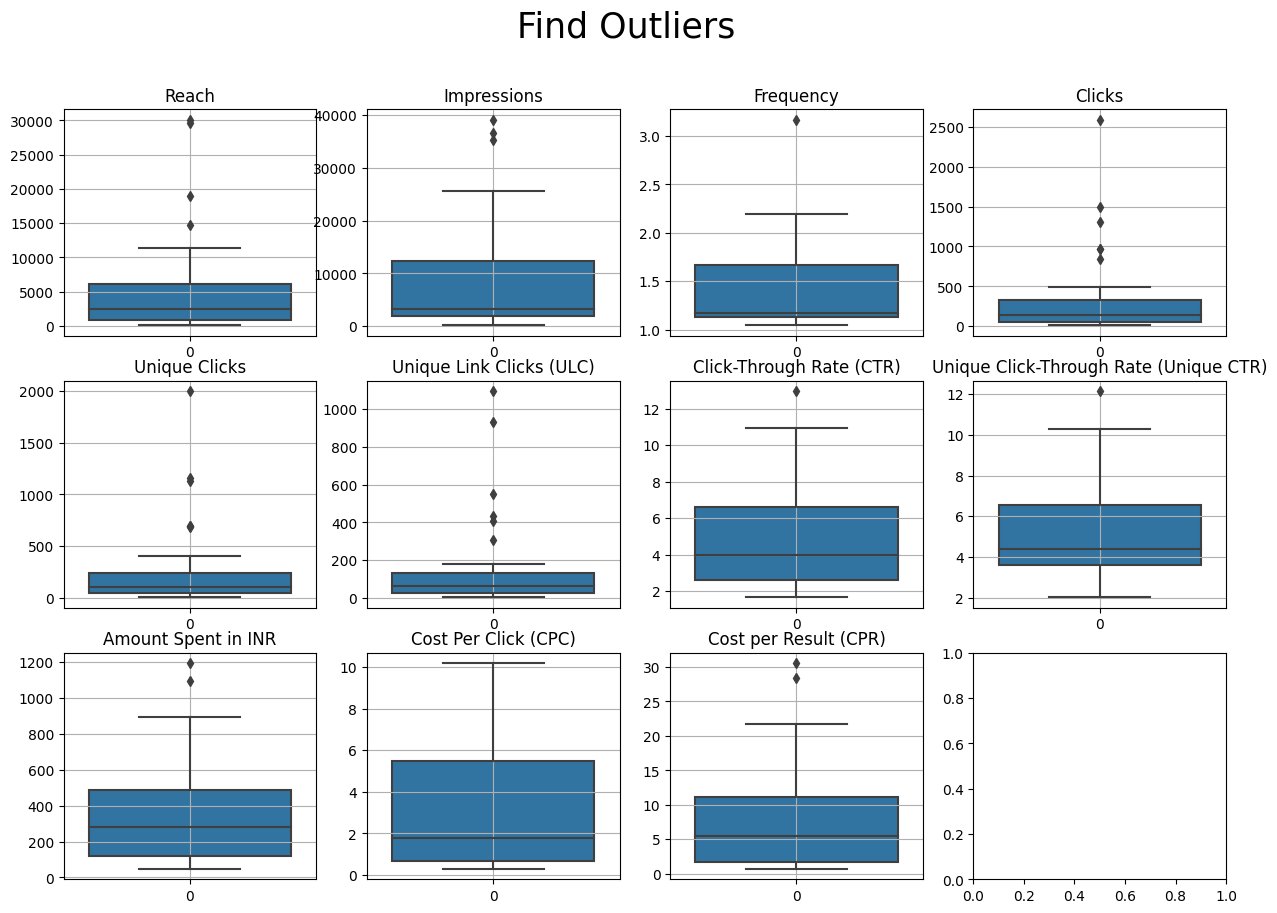

In [23]:
cols=['Reach','Impressions', 'Frequency', 'Clicks', 'Unique Clicks',
       'Unique Link Clicks (ULC)', 'Click-Through Rate (CTR)',
       'Unique Click-Through Rate (Unique CTR)', 'Amount Spent in INR',
       'Cost Per Click (CPC)', 'Cost per Result (CPR)']

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))

for i, column in enumerate(cols):
    row = i // 4
    col = i % 4
    sns.boxplot(df[column], ax=axes[row, col])
    axes[row, col].set_title(column)
    axes[row, col].grid()
plt.suptitle('Find Outliers', fontsize=25)
plt.show()

There are many columns having outliers, but most of them seem like natural outliers came from the population

## Module 4: Data Visualization

#### Correlation between all features

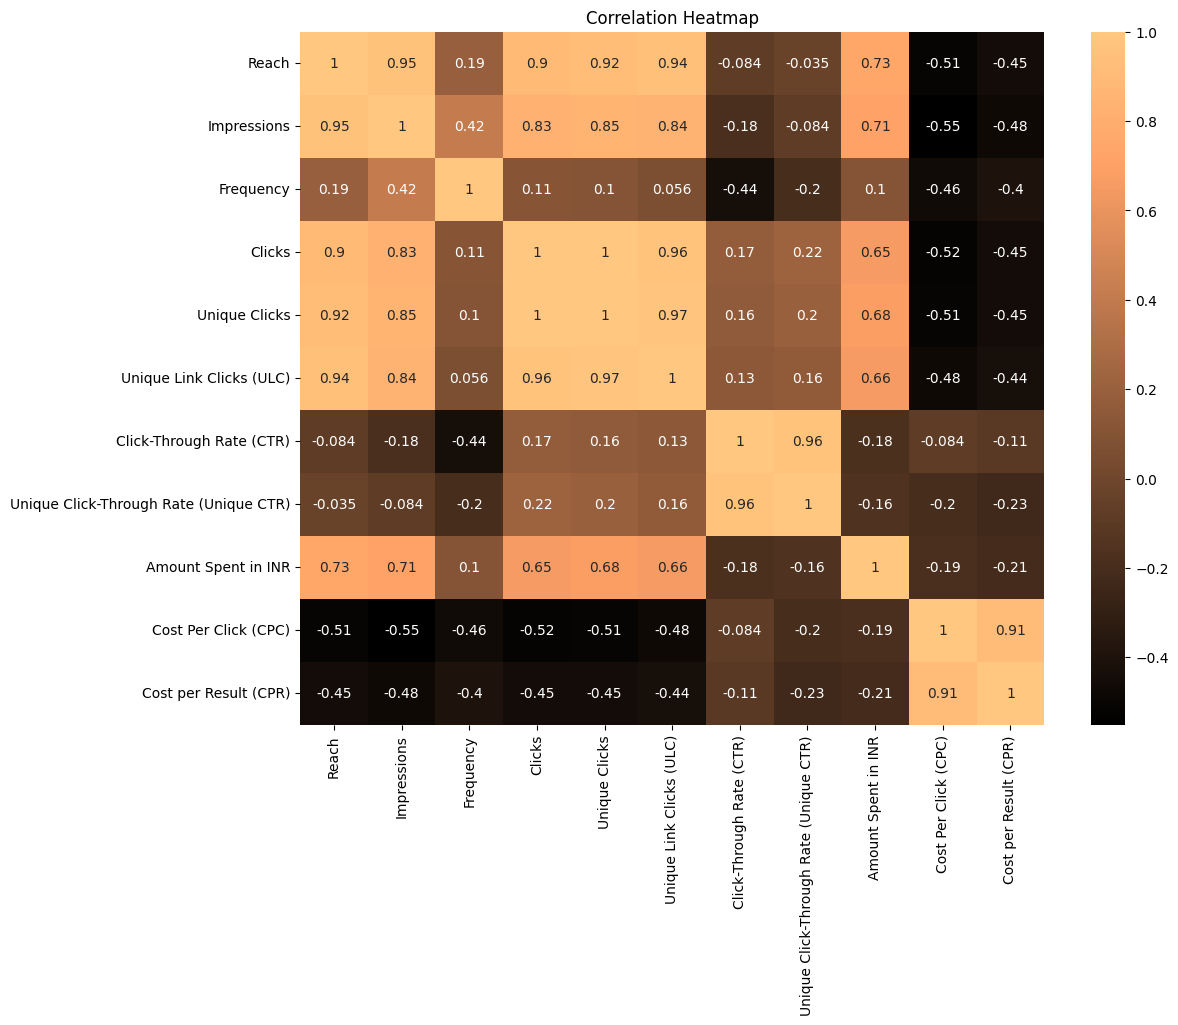

In [73]:
df1=df.drop(['Campaign ID', 'Campaign Name', 'Audience', 'Age', 'Geography'], axis=1)
plt.figure(figsize=(12,9))
sns.heatmap(df1.corr(), annot=True, cmap='copper')
plt.title('Correlation Heatmap')
plt.show()

#### Total Reach by Age Group

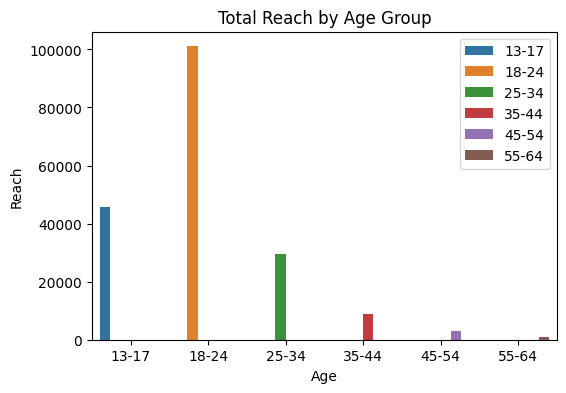

In [65]:
plt.figure(figsize=(6,4))

df_bar=df.groupby('Age')['Reach'].sum().reset_index()
sns.barplot(data=df_bar, x='Age', y='Reach', hue='Age')

plt.xlabel('Age')
plt.ylabel('Reach')
plt.title('Total Reach by Age Group')
plt.legend(loc='upper right')

# Hiển thị biểu đồ
plt.show()

Overall, it is clear that users from 18 to 24 years old reached the campaign the most, while clients between 55 and 64 years old had the least reached. 

#### Total Amount Spent by Age Group

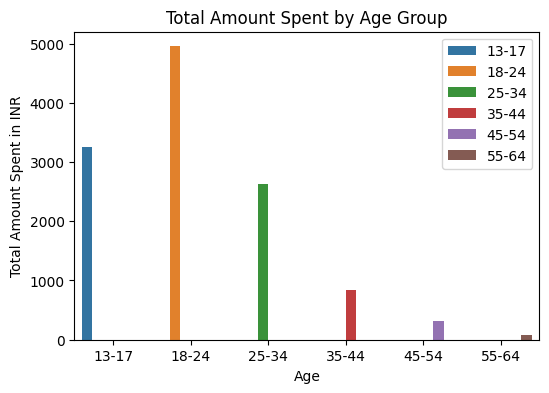

In [68]:
plt.figure(figsize=(6,4))

df_bar=df.groupby('Age')['Amount Spent in INR'].sum().reset_index()
sns.barplot(data=df_bar, x='Age', y='Amount Spent in INR', hue='Age')

plt.xlabel('Age')
plt.ylabel('Total Amount Spent in INR')
plt.title('Total Amount Spent by Age Group')
plt.legend(loc='upper right')

# Hiển thị biểu đồ
plt.show()

The chart illustrates that the highest total amount spent in INR is age group(18-24), whereas age group (55-64) has the lowest.

#### Comparison of Total Cost for Campaigns

C:\Users\Welcome\AppData\Local\Temp\ipykernel_13296\3456116387.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bar_plot=sns.barplot(data=dd, x='Amount Spent in INR', y='Campaign ID', ci=None)


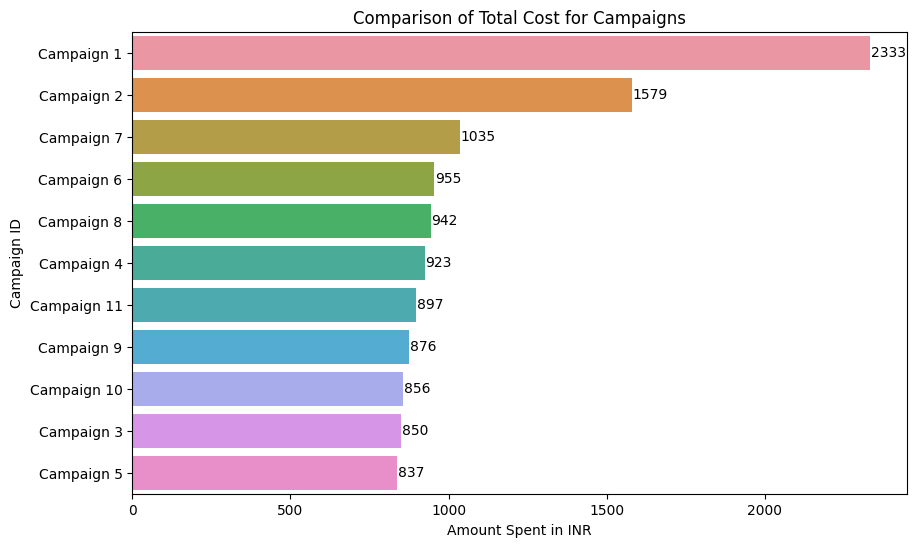

In [22]:
plt.figure(figsize=(10,6))
dd=df.groupby(['Campaign ID'])['Amount Spent in INR'].sum().reset_index()
dd=dd.sort_values('Amount Spent in INR', ascending=False)
bar_plot=sns.barplot(data=dd, x='Amount Spent in INR', y='Campaign ID', ci=None)
for p in bar_plot.patches:
    width = p.get_width()
    plt.text(width + 3, p.get_y() + p.get_height() / 2, int(width), ha='left', va='center')
plt.title('Comparison of Total Cost for Campaigns')
plt.show()

The bar chart show that SHU_6 (Educators and Principals) is the highest amount spent in INR, while the least amount in INR is SHU_Students(Ghana).

#### Cost Optimization

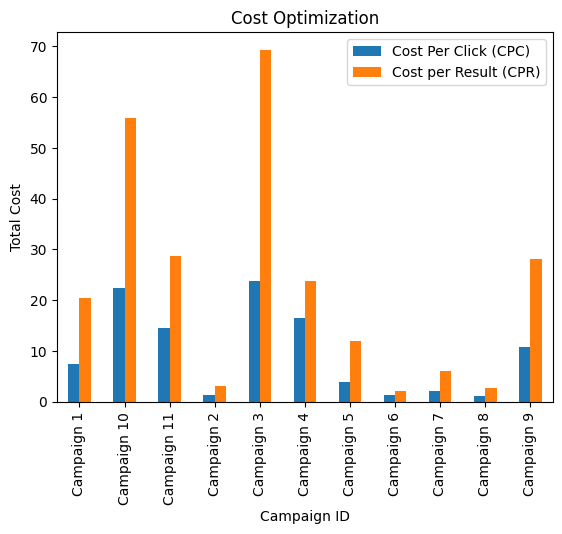

In [24]:
b=['Cost Per Click (CPC)', 'Cost per Result (CPR)']
df3=df.groupby('Campaign ID')[b].sum()
df3.plot(kind='bar', stacked=False)
plt.xlabel('Campaign ID')
plt.ylabel('Total Cost')
plt.title('Cost Optimization')
plt.show()

#### Reach and Scope Optimization

<Figure size 1000x600 with 0 Axes>

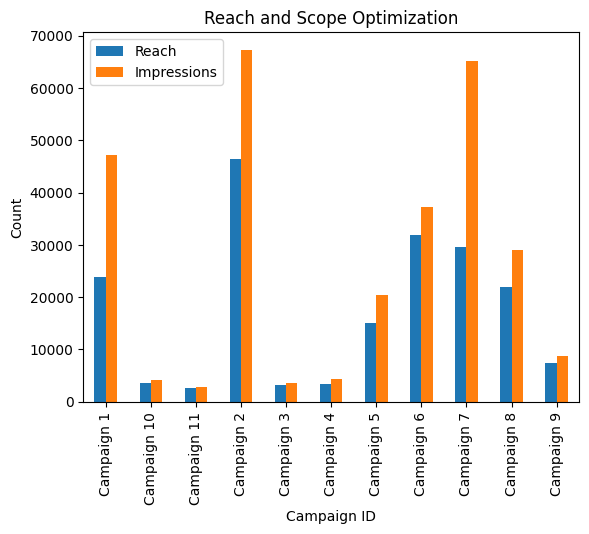

In [14]:
plt.figure(figsize=(10,6))
a=['Reach','Impressions']
df2=df.groupby('Campaign ID')[a].sum()
df2.plot(kind='bar', stacked=False)
plt.xlabel('Campaign ID')
plt.ylabel('Count')
plt.title('Reach and Scope Optimization')
plt.show()

#### Facebook Ad Traffic Optimization

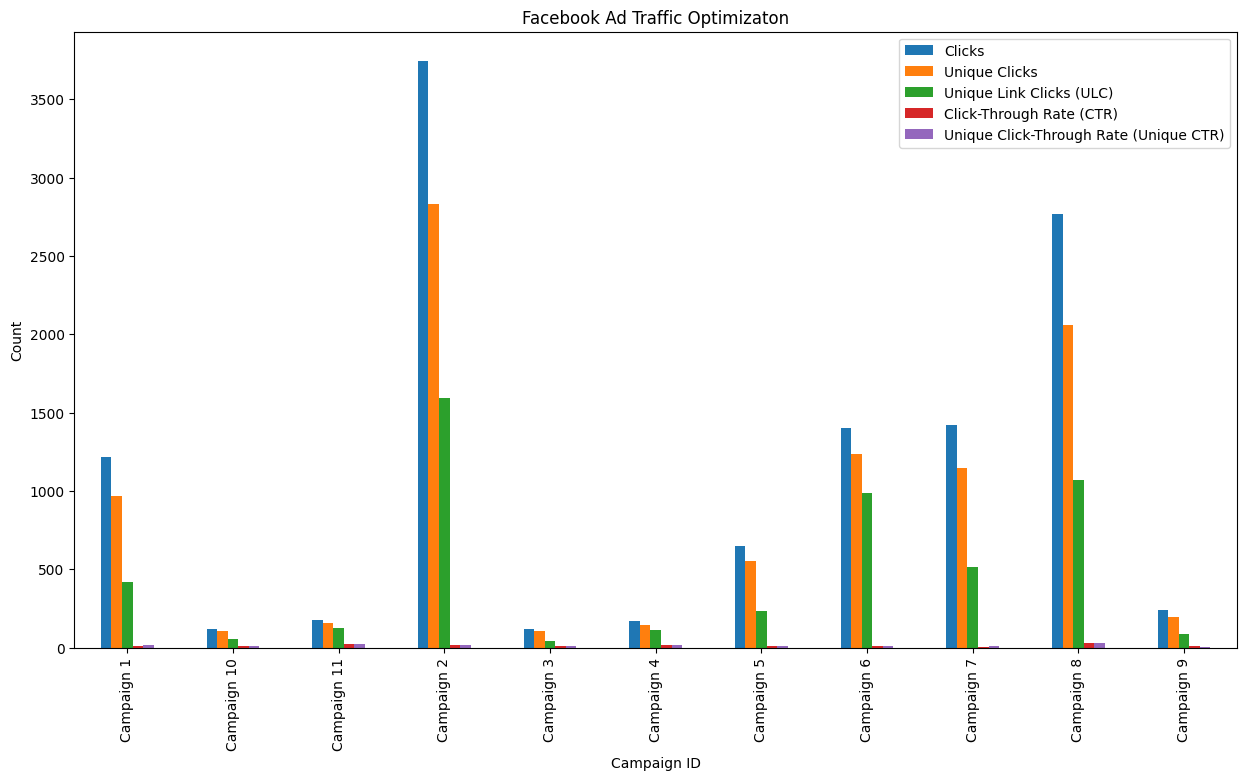

In [28]:
c=['Clicks', 'Unique Clicks', 'Unique Link Clicks (ULC)', 'Click-Through Rate (CTR)', 'Unique Click-Through Rate (Unique CTR)']
df4=df.groupby('Campaign ID')[c].sum()
df4.plot(kind='bar', stacked=False, figsize=(15,8))
plt.xlabel('Campaign ID')
plt.ylabel('Count')
plt.title('Facebook Ad Traffic Optimizaton')
plt.show()

## Module 5: Recommendation

Based on Cost Optimization, Reach and Scope, and Facebook Ad Traffic Optimization, I recommend that to discontinue Campaign 3 in order to make effective use of financial resources.

* A high cost per click (CPC) and cost per result (CPR) indicate that the campaign is expensive relative to the results it is achieving. 

* Low reach and impressions suggest that the campaign is not reaching a large audience, while low clicks, unique clicks, unique link clicks (ULC), click-through rate (CTR), and unique click-through rate (Unique CTR) suggest that the campaign is not engaging its audience effectively.